In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as cte

In [2]:
#Initial parameters
m = 0.255 * u.kg
R = (4.5 * u.cm).to(u.m)
l = (10 * u.cm).to(u.m)
L = (70 * u.cm).to(u.m)
I = ((3/5) * m * R**2) 
the = np.arctan(R/l)
phi = np.arctan((5*u.cm).to(u.m)/L)
psi = (15 * u.degree).to(u.rad)
psi2 = (20 * u.degree).to(u.rad)

In [132]:
#Validating tangents condition and calculating equilibrium psi
if np.tan(phi) < np.tan(psi)*np.tan(the):
  print("The condition is accomplished for psi=15°:", (np.tan(phi)*u.rad).to(u.deg).round(3), "<",
        (np.tan(psi)*np.tan(the)*u.rad).to(u.deg).round(3), ",and for psi=20°:", (np.tan(phi)*u.rad).to(u.deg).round(3), "<",
        (np.tan(psi2)*np.tan(the)*u.rad).to(u.deg).round(3))

#Getting the equilibrium angle of the setting
eq_psi = np.arctan(np.tan(phi)/np.tan(the))
print("The equilibrium psi angle is:", eq_psi.to(u.deg).round(2))

The condition is accomplished for psi=15°: 4.093 deg < 6.909 deg ,and for psi=20°: 4.093 deg < 9.384 deg
The equilibrium psi angle is: 9.02 deg


# Data Analysis

In [3]:
#Defining the data analysis function with ploting v vs x
def anDat (loc, cant, tmax_id, deg):
    data_tot = pd.DataFrame()
    data_prom = pd.DataFrame()
    for i in range(1, cant+1, 1):
        data = pd.read_csv(loc + str(i) + ".csv", skiprows=1)
        data_tot["t_" + str(i)] = data.t
        data_tot["x_" + str(i)] = data.x
        data_tot["y_" + str(i)] = data.y
        data_tot["v_" + str(i)] = data.v
        data_tot["v_" + str(i)][0] = 0
        plt.plot(data.x[0:90],data.v[0:90], "--", label=str(i))
        plt.title(r"$\psi =" + deg + "°$ raw data", size=14)
        plt.xlabel(r"$x[m]$", size=12)
        plt.ylabel(r"$v[\frac{m}{s^2}]$", size=12)
        plt.grid(alpha=0.4)
        plt.legend()
    
    data_tot.drop(range(tmax_id,len(data_tot),1), axis=0, inplace=True)
    
    data_std = pd.DataFrame()
    
    for i in ["t", "x", "y", "v"]:
        data_prom[i] = round(data_tot[[i+"_"+str(1),i+"_"+str(2),
                                i+"_"+str(3),i+"_"+str(4),
                                i+"_"+str(5),i+"_"+str(6),
                                i+"_"+str(7)]].mean(axis=1, skipna=True),4)
        
        data_std[i] = data_tot[[i+"_"+str(1),i+"_"+str(2),
                                i+"_"+str(3),i+"_"+str(4),
                                i+"_"+str(5),i+"_"+str(6),
                                i+"_"+str(7)]].std(axis=1, skipna=True)
    
    plt.figure()
    plt.errorbar(data_prom.x, data_prom.v, data_std.v, color="purple",
                 errorevery=3, ecolor="black", elinewidth=0.7, capsize=3, label="Standard Deviation")
    # plt.plot(data_prom.x, data_prom.v, "--", color="purple")
    plt.title(r"$\psi =" + deg + "°$ mean data", size=14)
    plt.xlabel(r"$x[m]$", size=12)
    plt.ylabel(r"$v[\frac{m}{s^2}]$", size=12)
    plt.grid(alpha=0.4)
    plt.legend()
    
    data_prom.to_csv("../Results/data_prom_"+deg+".csv", sep=",", index=False)
    data_std.to_csv("../Results/data_std_"+deg+".csv", sep=",", index=False)
    
    return data_prom, data_std

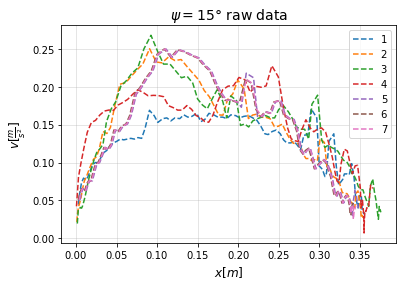

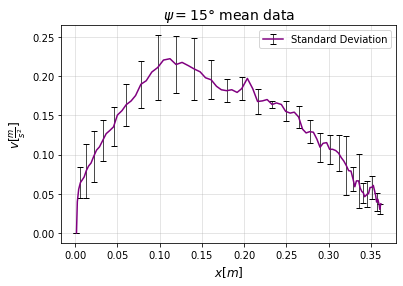

In [4]:
data30, std30 = anDat("../Data/30/", 7, 89, "15")

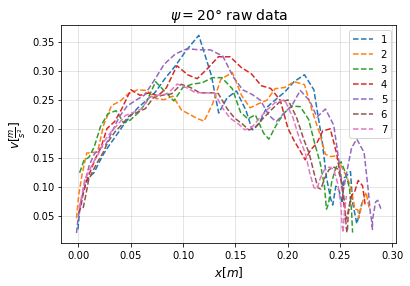

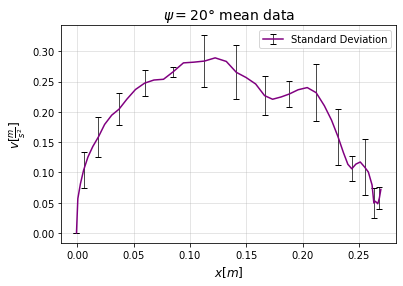

In [5]:
data40, std40 = anDat("../Data/40/", 7, 47, "20")
# data40.to_csv("data_prom_40.csv", sep=",", index=False)

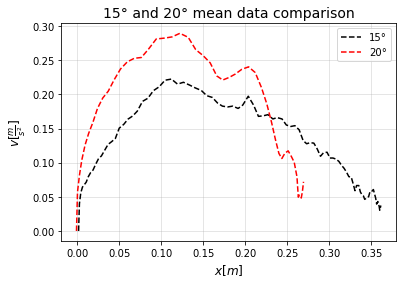

In [227]:
plt.plot(data30.x, data30.v, "k--", label="15°")
plt.plot(data40.x, data40.v, "r--", label="20°")
plt.title("15° and 20° mean data comparison", size=14)
plt.xlabel(r"$x[m]$", size=12)
plt.ylabel(r"$v[\frac{m}{s^2}]$", size=12)
plt.grid(alpha=0.4)
plt.legend()

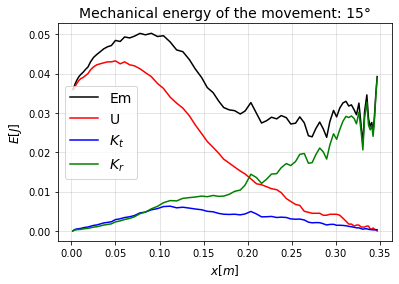

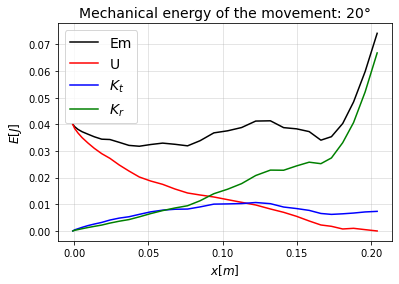

In [46]:
#Mechanical energy conservation
def r(x, Psi):
    r = R.value - np.tan(the)*np.tan(Psi)*x
    return r
def MechEn(data, Psi, deg):
    # U = m*cte.g0*(data.y)
    U = m*cte.g0*(data.y-data.y[len(data.y)-1])
    Kt = 0.5*m*data.v**2
    Kr = 0.5*I*(data.v/r(data.x, Psi))**2
    Em = U+Kt+Kr
    plt.figure()
    plt.plot(data.x,Em, "k", label="Em")
    plt.plot(data.x,U, "r", label="U")
    plt.plot(data.x,Kt, "b", label=r"$K_t$")
    plt.plot(data.x,Kr, "g", label=r"$K_r$")
    plt.title("Mechanical energy of the movement: " + deg + "°", size=14)
    plt.xlabel(r"$x[m]$", size=12)
    plt.ylabel(r"$E[J]$", size=12)
    # plt.ylim([-0.005, 0.1])
    plt.grid(alpha=0.4)
    plt.legend(prop={"size":14})
    
    # if deg == "15":
    #     plt.xlim([-0.008,0.3])
    # elif deg == "20":
    #     plt.xlim([-0.008,0.22])
    #     plt.legend(prop={"size":13})

MechEn(data30[:len(data30.x)-9], psi, "15")
MechEn(data40[:len(data40.x)-17], psi2, "20")
# plt.plot(data_prom.x, np.full(len(data_prom.x),0))

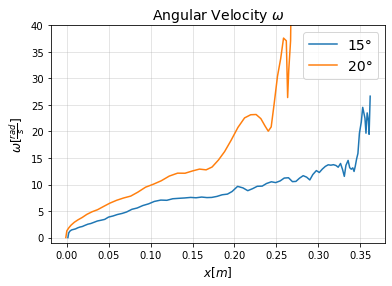

In [13]:
w = (data30.v/r(data30.x,psi))
plt.plot(data30.x, w, label="15°")
w = (data40.v/r(data40.x,psi2))
plt.plot(data40.x, w, label="20°")
plt.legend()
plt.title(r"Angular Velocity $\omega$", size=14)
plt.xlabel(r"$x[m]$", size=12)
plt.ylabel(r"$\omega[\frac{rad}{s}]$", size=12)
plt.ylim([-1, 40])
plt.grid(alpha=0.4)
plt.legend(prop={"size":14})

In [177]:
# np.sqrt(10*cte.g0.value*(-data40.y[len(data40.t)-1]+data40.y[0])/3*R.value**2)]
np.sqrt(10*cte.g0.value*0.02/3*R.value**2)

0.03638540572812127

In [49]:
niu_k= 0.4

t_1 = np.linspace(0,2.4,50) * u.s
angle_1 = np.full(50,the)

In [50]:
def R(angle,times):
  X = 0.5*cte.g0*(np.sin(angle)-niu_k*np.cos(angle))*(times**2)
  
  return X

In [51]:
r_pos=R(angle_1, t_1)

In [52]:
x_pos=r_pos*np.cos(angle_1)
y_pos=r_pos*np.sin(angle_1)

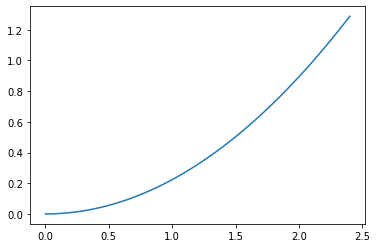

In [57]:
plt.plot(t_1,r_pos)